In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import librosa
from pesq import pesq
from mir_eval.separation import bss_eval_sources
import torch
from torch import tensor
from torchmetrics.audio import ScaleInvariantSignalNoiseRatio
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


In [4]:
# basic parameters
fs = 16000
Second = 4.5
reverberation_time_list = [0.2, 0.4, 0.6]
reverberation_time = np.asarray(reverberation_time_list)

# initialize saving vector
pesq_soucre_TIKR = np.zeros(len(reverberation_time))
pesq_interferer_TIKR = np.zeros(len(reverberation_time))
pesq_y_noisy_1 = np.zeros(len(reverberation_time))
pesq_y_noisy_2 = np.zeros(len(reverberation_time))

sdr_soucre_TIKR = np.zeros(len(reverberation_time))
sdr_interferer_TIKR = np.zeros(len(reverberation_time))
sdr_y_noisy_1 = np.zeros(len(reverberation_time))
sdr_y_noisy_2 = np.zeros(len(reverberation_time))

for i in range(len(reverberation_time)) :
    # assemble filename
    filename_soucre_TIKR = 'wav_TIKR./source_TIKR_' + str(reverberation_time[i]) + '.wav'
    filename_interferer_TIKR = 'wav_TIKR./interferer_TIKR_' + str(reverberation_time[i]) + '.wav'
    filename_y_noisy = 'wav_TIKR./y_noisy_' + str(reverberation_time[i]) + '.wav'

    # use librosa to load .wav
    source_ground_truth, fs= librosa.load('wav_TIKR./source_ground-truth.wav', sr=fs, mono=True, offset=0.0, duration=Second, dtype=np.float32)
    interferer_ground_truth, fs= librosa.load('wav_TIKR./interferer_ground-truth.wav', sr=fs, mono=True, offset=0.0, duration=Second, dtype=np.float32)
    soucre_TIKR, fs= librosa.load(filename_soucre_TIKR, sr=fs, mono=True, offset=0.0, duration=Second, dtype=np.float32)
    interferer_TIKR, fs= librosa.load(filename_interferer_TIKR, sr=fs, mono=True, offset=0.0, duration=Second, dtype=np.float32)
    y_noisy, fs= librosa.load(filename_y_noisy, sr=fs, mono=True, offset=0.0, duration=Second, dtype=np.float32)

    # compute PESQ
    pesq_soucre_TIKR[i] = pesq(fs, source_ground_truth, soucre_TIKR , 'nb')
    pesq_interferer_TIKR[i] = pesq(fs, interferer_ground_truth, interferer_TIKR, 'nb')
    pesq_y_noisy_1[i] = pesq(fs, source_ground_truth, y_noisy , 'nb')
    pesq_y_noisy_2[i] = pesq(fs, interferer_ground_truth, y_noisy, 'nb')
 
    # compute SDR
    (sdr_soucre_TIKR[i], sir, sar, perm) = bss_eval_sources(source_ground_truth, soucre_TIKR)
    (sdr_interferer_TIKR[i], sir, sar, perm) = bss_eval_sources(interferer_ground_truth, interferer_TIKR)
    (sdr_y_noisy_1[i], sir, sar, perm) = bss_eval_sources(source_ground_truth, y_noisy)
    (sdr_y_noisy_2[i], sir, sar, perm) = bss_eval_sources(interferer_ground_truth, y_noisy)


Text(0.5, 1.0, 'source 1')

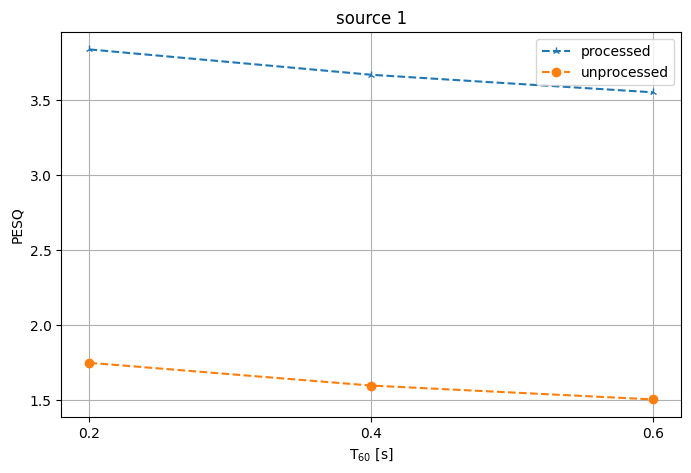

In [5]:
# plot PESQ vs T60
fig1 = plt.figure(figsize=(8, 5))
ax1 = fig1.add_subplot()
ax1.plot(reverberation_time, pesq_soucre_TIKR, linestyle='--', marker='2')
ax1.plot(reverberation_time, pesq_y_noisy_1, linestyle='--', marker='o')
ax1.grid(True)
ax1.set_xticks(reverberation_time_list)
ax1.set_xlabel('T$_{60}$ [s]') 
ax1.set_ylabel('PESQ')
ax1.legend(['processed', 'unprocessed'])
ax1.set_title('source 1')

Text(0.5, 1.0, 'source 2')

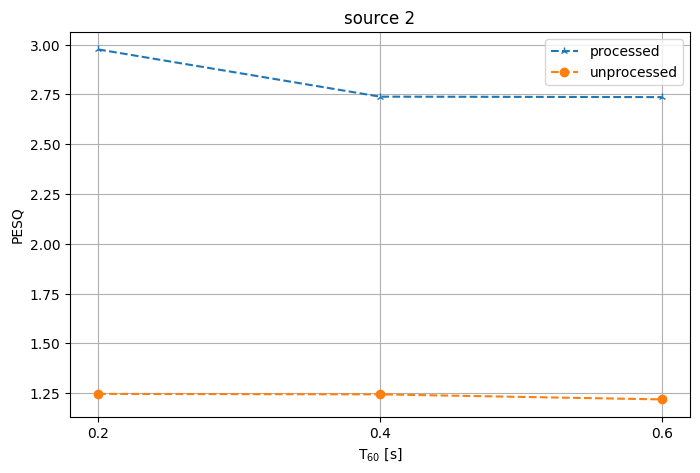

In [6]:
# plot PESQ vs T60
fig2 = plt.figure(figsize=(8, 5))
ax2 = fig2.add_subplot()
ax2.plot(reverberation_time, pesq_interferer_TIKR, linestyle='--', marker='2')
ax2.plot(reverberation_time, pesq_y_noisy_2, linestyle='--', marker='o')
ax2.grid(True)
ax2.set_xticks(reverberation_time_list)
ax2.set_xlabel('T$_{60}$ [s]') 
ax2.set_ylabel('PESQ')
ax2.legend(['processed', 'unprocessed'])
ax2.set_title('source 2')

Text(0.5, 1.0, 'source 1')

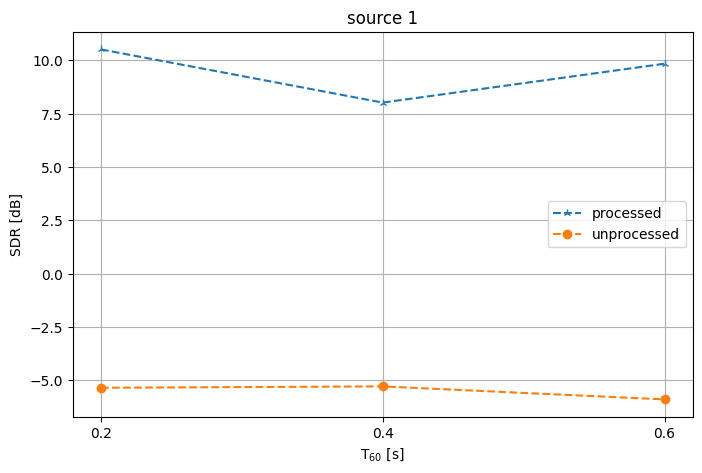

In [7]:
# plot SDR vs T60
fig3 = plt.figure(figsize=(8, 5))
ax3 = fig3.add_subplot()
ax3.plot(reverberation_time, sdr_interferer_TIKR, linestyle='--', marker='2')
ax3.plot(reverberation_time, sdr_y_noisy_2, linestyle='--', marker='o')
ax3.grid(True)
ax3.set_xticks(reverberation_time_list)
ax3.set_xlabel('T$_{60}$ [s]') 
ax3.set_ylabel('SDR [dB]')
ax3.legend(['processed', 'unprocessed'])
ax3.set_title('source 1')

Text(0.5, 1.0, 'source 2')

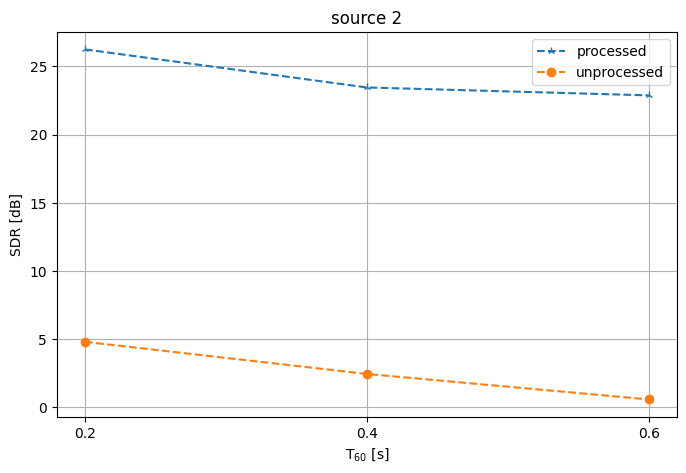

In [8]:
# plot SDR vs T60
fig4 = plt.figure(figsize=(8, 5))
ax4 = fig4.add_subplot()
ax4.plot(reverberation_time, sdr_soucre_TIKR, linestyle='--', marker='2')
ax4.plot(reverberation_time, sdr_y_noisy_1, linestyle='--', marker='o')
ax4.grid(True)
ax4.set_xticks(reverberation_time_list)
ax4.set_xlabel('T$_{60}$ [s]') 
ax4.set_ylabel('SDR [dB]')
ax4.legend(['processed', 'unprocessed'])
ax4.set_title('source 2')